#CSE 493W Wireless Communication, 2024
##Homework 1
###Due Tuesday April 9 (before midnight)

Collaboration etc: it is fine to discuss problems with classmates. Each person must write and turn in their own code. It is also OK to re-use code from the Notebooks I provide. Please select Save a Copy in Drive (or in Github) and then insert your answers into your copy of the Colab notebook. We will ask you to provide the link to your answers (TBD how we will ask you to provide that link). When you are asked to provide a value in dB (or dBm etc), please give an integer dB value...no need to write something like 33.1 dB. Please round sensibly: if your answer is that the signal needs to be at least 10.1 dB, then you should round up to 11dB.

***Question 1a [6 points]***

Model the propagation of three 915MHz rays, one direct from Tx to Rx, one that bounces off the floor, and one that bounces off the ceiling. Sweep the distance between Tx and Rx from 0 to 10m, and ***plot the magnitude of the signal that results when the three beams add at the receiver***, for each receiver distance. For the height above the floor, use hf = 1.5m, and for the height below the ceiling, us hc = 2.5m. Assume that angle of incidence == angle of reflection for both floor and ceiling, which implies that the bounce point is at the mid-point between Tx and Rx for both the floor bounce and the ceiling bounce. Note: if you do not see the figure below, log in to gitlab.cs.washington.edu and reload, or consult the pdf of this assignment (posted on Canvas).

***Question 1b [4 points]***

The floor and ceiling are made of different materials. Reflections can sometimes change the phase of the reflected signal. Suppose that the bounce off the floor causes a 180 degree phase shift, and the bounce off the ceiling does not cause any phase shift (which is how we've been modeling the reflections so far). ***Plot the magnitude of the sum of the three beams, now including the 180 degree phase shift for the floor-bounce beam, as the TX-RX distance is swept from 0 to 10m.***
![picture](https://gitlab.cs.washington.edu/jrs/cse490w/raw/master/ThreeBeamPropagationNoVals.png)

Frequency of  915000000.0 Hz has wavelength of 0.32786885245901637 meters


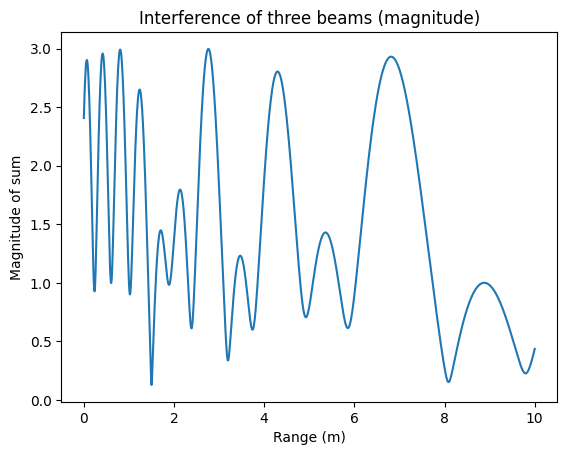

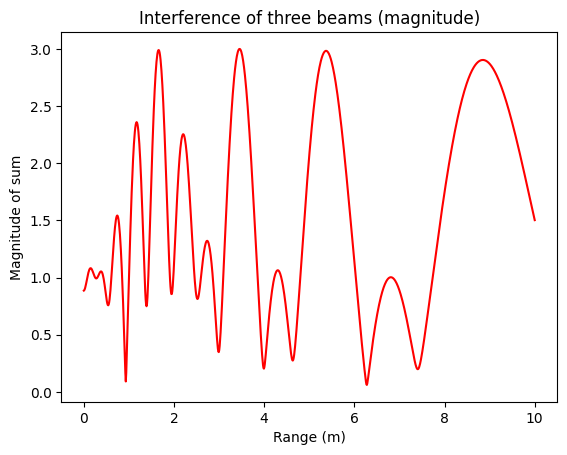

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(precision = 2)

x = np.linspace(0, 10, 1000)
f = 915e6
c = 3.00e8
wl = c / f
pi = np.pi

print("Frequency of ",f,"Hz has wavelength of",wl, "meters")

#direct
compamp1 = np.exp(1j*2*pi*(x/wl))

hf = 1.5
hc = 2.5
bouncex = x / 2.0

#floor bounce
Ttobounce = np.sqrt(hf**2 + bouncex**2) # Distance from T (Transmit) antenna to bounce location
Rfrombounce = np.sqrt((x-bouncex)**2 + hf**2)
TbounceR = Ttobounce + Rfrombounce
compamp2 = np.exp(1j*2*pi*(TbounceR/wl)) # complex amplitude of 2nd (bounce) path
compamp2phase = np.exp(1j*2*pi*((TbounceR + pi)/wl))

#ceiling bounce
Ttobounce = np.sqrt(hc**2 + bouncex**2) # Distance from T (Transmit) antenna to bounce location
Rfrombounce = np.sqrt((x-bouncex)**2 + hc**2)
TbounceR = Ttobounce + Rfrombounce
compamp3 = np.exp(1j*2*pi*(TbounceR/wl)) # complex amplitude of 3rd (bounce) path

resultantamp = compamp1+compamp2+compamp3
resultantamp2 = compamp1+compamp2phase+compamp3

resultantmag = np.abs(resultantamp)
plt.figure()
plt.plot(x, resultantmag)
plt.title("Interference of three beams (magnitude)")
plt.xlabel("Range (m)")
plt.ylabel("Magnitude of sum");

resultantmag = np.abs(resultantamp2)
plt.figure()
plt.plot(x, resultantmag, 'r')
plt.title("Interference of three beams (magnitude)")
plt.xlabel("Range (m)")
plt.ylabel("Magnitude of sum");

***Question 2 [10 points]*** Phase+Amplitude
Model a two beam bounce (rays 1 and 2 from the figure above), but this time include the effects of attenuation as well as phase shift. In other words, each beam will experience a path loss that increases with distance, which you should model in addition to the effect of phase shift. To avoid division by zero and other ``near field'' issues, just compute and plot the results from 1m to 10m (don't plot the closest range, 0 to 1m). Also, put the y axis on a log scale using plt.semilogy() instead of plt.plot().

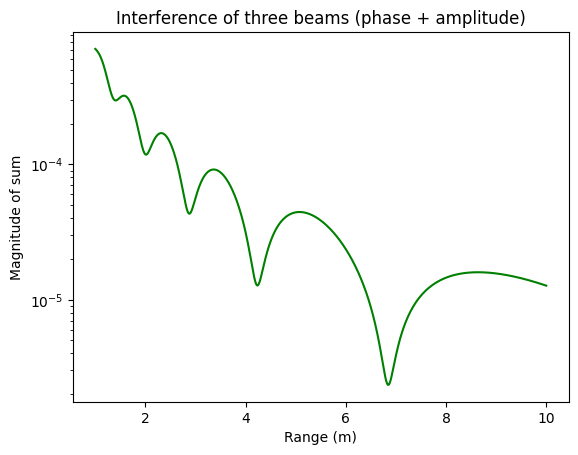

In [ ]:
x1 = np.linspace(1, 10, 1000)
def loss(R):
  return (wl/(4 * pi * R))**2

bouncex1 = x1 / 2.0

compamp1 = np.exp(1j*2*pi*(x1/wl)) * loss(x1)


Ttobounce = np.sqrt(hf**2 + bouncex1**2) # Distance from T (Transmit) antenna to bounce location
Rfrombounce = np.sqrt((x1-bouncex1)**2 + hf**2)
TbounceR = Ttobounce + Rfrombounce
compamp2phase = np.exp(1j*2*pi*((TbounceR + pi)/wl)) * loss(TbounceR)


resultantamp = compamp1 + compamp2phase

resultantmag = np.abs(resultantamp)
plt.figure()
plt.semilogy(x1, resultantmag, 'g')
plt.title("Interference of three beams (phase + amplitude)")
plt.xlabel("Range (m)")
plt.ylabel("Magnitude of sum");


***Question 3*** Moonbounce. In [Earth-Moon-Earth communication](https://en.wikipedia.org/wiki/Earth%E2%80%93Moon%E2%80%93Earth_communication),
radio operators far away from one another on Earth can communicate by bouncing their radio signals off the moon. Suppose you want to communicate with your ham radio pal using EME communication on the 2m band (i.e. wavelength is 2m).

***3a*** ***What frequency is the 2m band? [2 points]***


$$
f = \frac{c}{\lambda} = \frac{3*10^8}{2} = 1.5 * 10^8 = \boxed{\text{150 MHz}}
$$

***3b [4 points]*** The Moon is on average 384,000 km from the earth. ***What is the total path loss in dB*** for the propagation from the Earth to the Moon, and from the Moon back to the Earth, ignoring losses to absorbtion, and any other losses.  For this part of the question, we are not thinking about the antennas on both sides, or the TX power, or what happens when the signal bounces off the moon (for now assume all of the signal is reflected)---the question is just how much loss is there due to propagation over the long distances.

$$
20 \log(\frac{λ}{4πR}) = 20 \log(\frac{2}{4 * \pi * 384000 * 10^3 * 2}) = \boxed{\text{194 db}}
$$

***3c [4 points]*** Radar Equation for Realistic Reflection. Suppose you have a 1kW radio transmitter, a 30dBi dish antenna on the TX side, and a 30dBi antenna on the RX side. 7 percent of the signal that hits the moon is reflected---the rest is lost to absorbtion. ***What is the strength of the signal in dBm received back at the earth after the round trip to the moon?*** Please round to the nearest integer value of dBm. To be clear, here we are looking for ``radar equation''-style computation, where there is a path loss proportional to $\frac{1}{R^2}$ in each direction, which compounds to $\frac{1}{R^4}$ for the whole round trip.

$$
P_r = \frac{P_tG_tG_r\etaπr^2λ^4}{(4\pi d)^4}
\\= \frac{1000 * 30 * 30 * 0.07 * 1740^2 * 2^4}{(4π * 384000)^4} \\= 1.76825 * 10^{-15} \text{W} = 10\log(\frac{1.76825 * 10^{-12} \text{mW}}{1\text{mW}}) \text{dBm} = \text{-117.52 dBm} = \boxed{\text{-118 dBm}}
$$